**1/14/21**

Purpose of this notebook is to analyze the data from the two runs of the metaproteomic data from the Tailored V2 databases and determine what percent of peptides is shared between them.

In [1]:
from elliot_utils import *

In [2]:
analysisPath = Path.cwd().joinpath('analysis_files/comparing_runs/')
figPath = Path.cwd().joinpath('figures/comparing_runs/')

In [3]:
r1ResPath = Path.cwd().joinpath('../1-18-21_NextflowMSGF_R1_Tailored/output/')
r2ResPath = Path.cwd().joinpath('../1-19-21_NextflowMSGF_R2_Tailored/output/')

In [4]:
r1Results = getOrderedFiles(r1ResPath, '.tsv')
r2Results = getOrderedFiles(r2ResPath, '.tsv')

In [5]:
# Get the peptide sequences for all spectra with q < 0.01, regardless of what the spectrum was matched to
# Returns the peptide sequences in a set
def getPeptidesSet(results):
    toReturn = set()
    for res in results:
        with res.open(mode='r') as tsvin:
            tsvReader = csv.reader(tsvin, delimiter='\t')
            for row in tsvReader:
                if row[PROTEIN_HITS] == 'Protein':
                    continue
                if not isSignificant(row):
                    break
                toReturn.add(row[PEPTIDE])
    return toReturn

In [6]:
r1Peptides = getPeptidesSet(r1Results)
r2Peptides = getPeptidesSet(r2Results)

In [7]:
r1Only = r1Peptides.difference(r2Peptides)
r2Only = r2Peptides.difference(r1Peptides)
bothPeptides = r1Peptides.intersection(r2Peptides)

In [8]:
print(f'# peptides only identified in R1: {str(len(r1Only))}')
print(f'# peptides only identified in R2: {str(len(r2Only))}')
print(f'# peptides identified in both runs: {str(len(bothPeptides))}')

# peptides only identified in R1: 7001
# peptides only identified in R2: 5559
# peptides identified in both runs: 13725


In [9]:
totalPeptides = len(r1Only) + len(r2Only) + len(bothPeptides)
r1Percent = (len(r1Only) / totalPeptides) * 100
r2Percent = (len(r2Only) / totalPeptides) * 100
bothPercent = (len(bothPeptides) / totalPeptides) * 100
print(f'R1 percent: {str(r1Percent)}')
print(f'R2 percent: {str(r2Percent)}')
print(f'Both percent: {str(bothPercent)}')

R1 percent: 26.634962906600723
R2 percent: 21.148944264789804
Both percent: 52.216092828609476


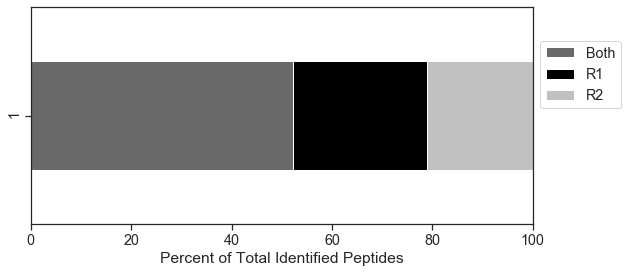

In [10]:
plt.rcParams["figure.figsize"] = (9, 4)
percentsDF = pd.DataFrame({'Run':['R1', 'Both', 'R2'], 'Percent of Identified Peptides':[r1Percent, bothPercent, r2Percent], '':[1, 1, 1]})
ax = percentsDF.pivot(index='', columns='Run', values='Percent of Identified Peptides').plot(kind='barh', stacked=True, rot=90, color=['dimgray', 'black', 'silver'])
ax.set_xlabel('Percent of Total Identified Peptides')
ax.set_xlim(0, 100)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.savefig(figPath.joinpath('percent_peptides_bar.png'), bbox_inches='tight', dpi=300)